## Allstate University Hackathon

## Swarnim Shekhar 
### MS Analytics, University of Chicago -'16
### Phone: 312 810 2995
#### Linkedin https://www.linkedin.com/in/swarnimshekhar

# This is the main document. A seperate supplementary document with R code is also provided to show some of the steps used.

In [1]:
%matplotlib inline

In [2]:
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
# these are new imports for dimensionality reduction
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
# these are new imports for clustering
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import zero_one_loss, confusion_matrix, accuracy_score, log_loss, classification_report, roc_curve, roc_auc_score
from sklearn import datasets
#import seaborn as sns
from sklearn.grid_search import GridSearchCV
from sklearn.externals.six import StringIO  
#import pydot 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from string import letters
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer
import time
import datetime
import cPickle
import xgboost as xgb
from sklearn import preprocessing
from pylab import rcParams
#from sknn.mlp import Classifier, Layer
from sklearn.grid_search import GridSearchCV

In [3]:
data = pd.read_csv("train-2.csv")
test = pd.read_csv("test.csv")

## Creating a new predictor variable which shows the age of the vehicle

In [4]:
data['YearGap'] = data.CalendarYear - data.ModelYear
test['YearGap'] = test.CalendarYear - test.ModelYear

In [7]:
data.head()

,RowID,CalendarYear,ModelYear,Make,Model,Cat1,Cat2,Cat3,Cat4,Cat5,...,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Response,YearGap
0,418079,2005,2004,AU,AU.14,B,C,A,A,A,...,-0.685256,-0.591295,-0.258498,F,-0.23153,-0.266117,4.209404,-0.251419,0,1
1,232625,2006,2003,R,R.30,B,C,B,A,A,...,-0.423241,-0.628158,0.054368,O,-0.23153,-0.266117,-0.272337,-0.251419,0,3
2,379029,2006,2006,AU,AU.14,B,A,A,A,A,...,-0.685256,-0.591295,-0.163872,M,-0.23153,-0.266117,-0.272337,-0.251419,1,0
3,181458,2007,2000,BU,BU.38,F,C,A,C,A,...,-0.171753,-0.972211,0.206426,O,-0.23153,-0.266117,-0.272337,-0.251419,0,7
4,192434,2005,1999,BU,BU.38,F,A,A,C,A,...,-0.272348,-0.972211,0.290987,M,-0.23153,-0.266117,-0.272337,-0.251419,1,6


### A look at correlations between all variables showed the variables Var1 .. to Var 8 highly correlated amongst each other. I plot the correlations 

/Users/swarnim/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


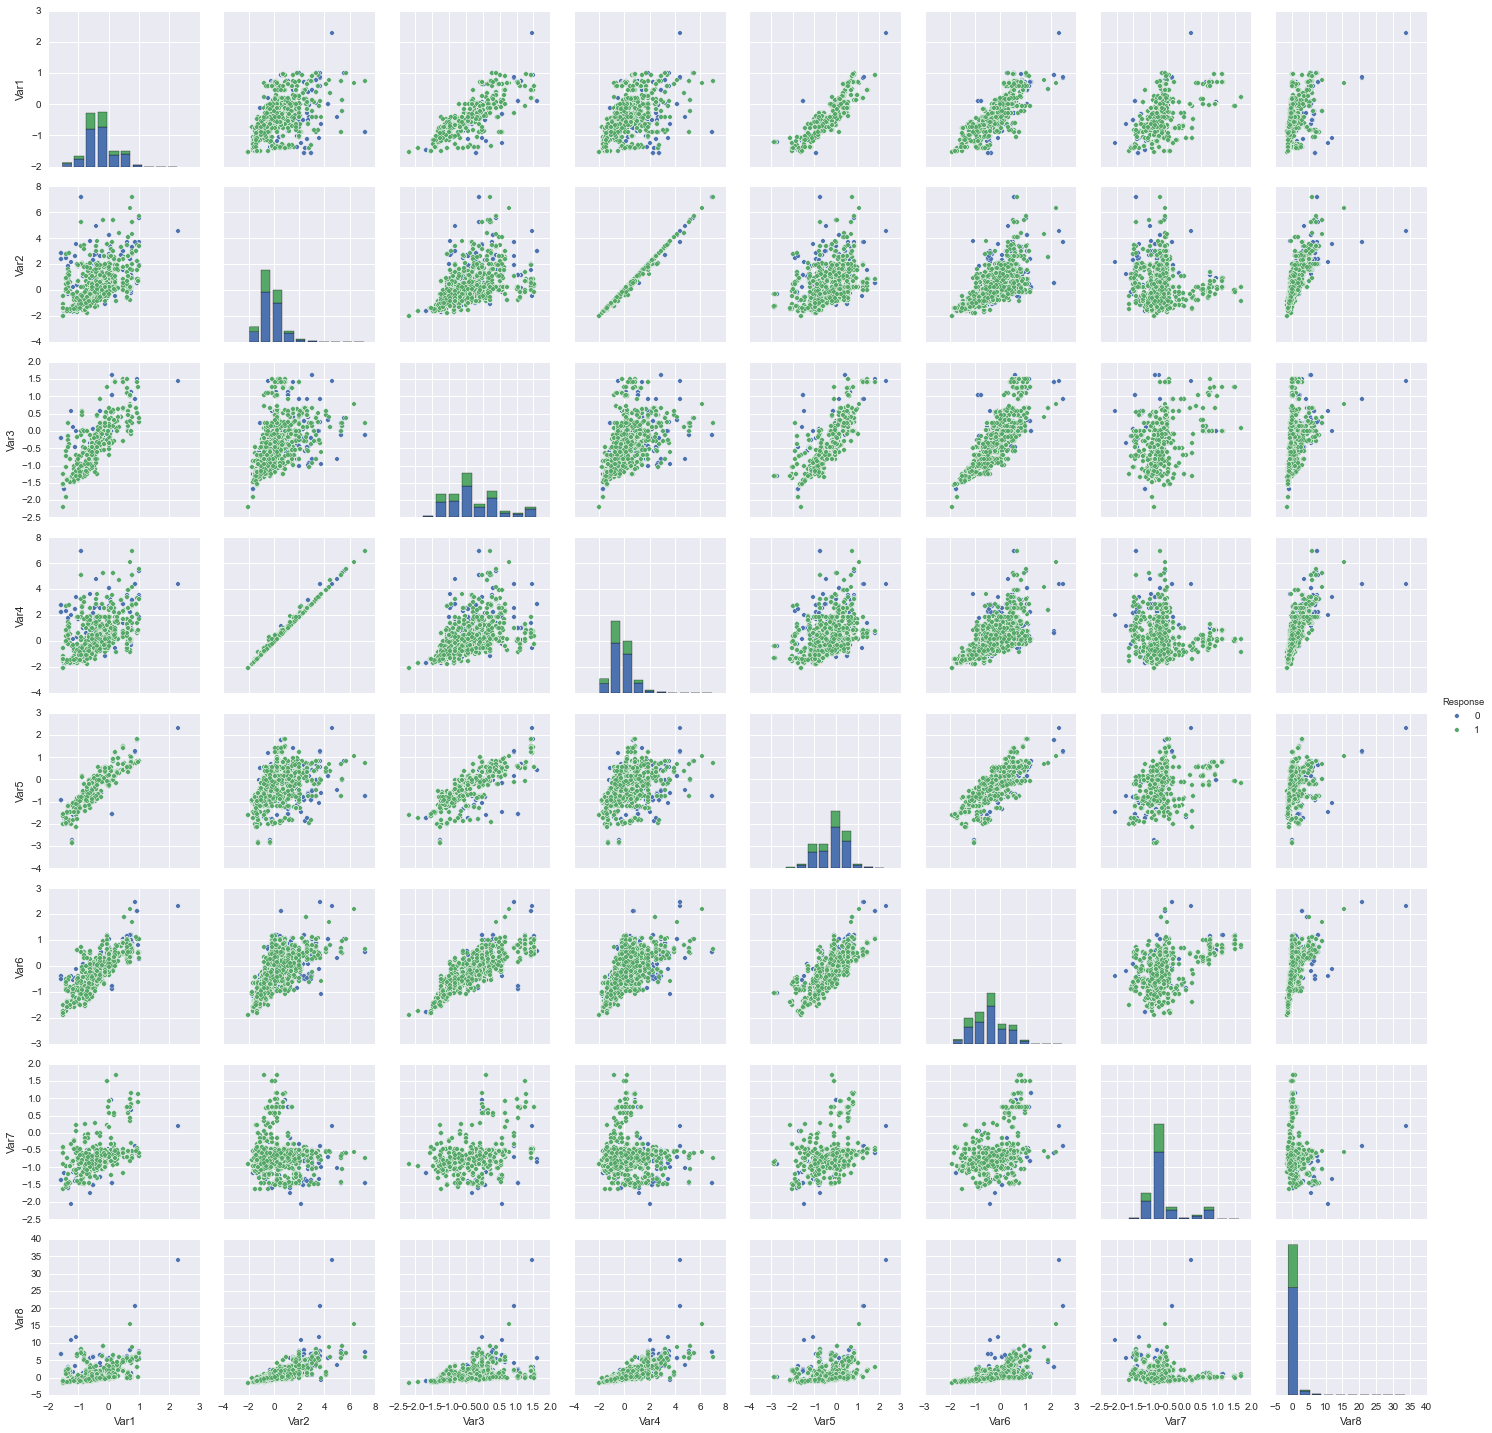

In [6]:
sns.pairplot(data, vars=["Var1", "Var2", "Var3", "Var4", "Var5", "Var6", "Var7", "Var8"], hue= "Response")
plt.show()

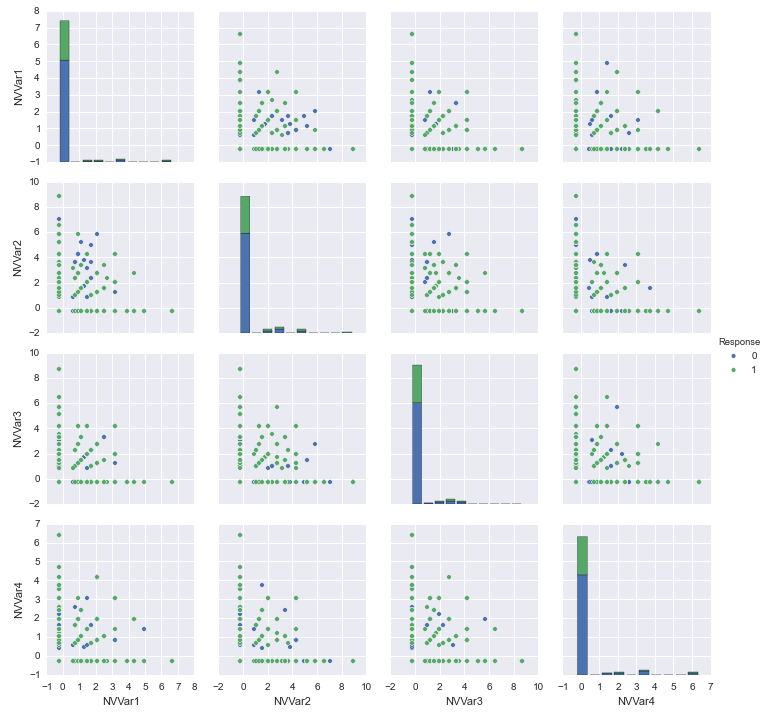

In [17]:
sns.pairplot(data, vars=["NVVar1", "NVVar2", "NVVar3", "NVVar4"], hue= "Response")

plt.show()

In [8]:
predictor = list(data.columns.values)
#predictor
predictor.remove("RowID")
predictor.remove("Response")
#predictor.remove("CalendarYear")
#predictor.remove("ModelYear")
#plot_pred = list(data.columns.values)
#plot_pred.remove("RowID")

In [9]:
X = data[predictor]
y= data["Response"]
TEST_X = test[predictor]

In [10]:
for f in X.columns:
    if X[f].dtype=='object':
        print(f)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X[f].values) + list(TEST_X[f].values))
        X[f] = lbl.transform(list(X[f].values))
        TEST_X[f] = lbl.transform(list(TEST_X[f].values))

/Users/swarnim/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/swarnim/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Make
Model
Cat1
Cat2
Cat3
Cat4
Cat5
Cat6
Cat7
Cat8
Cat9
Cat10
Cat11
Cat12
NVCat


In [11]:
#data.groupby(['col1', 'col2'])['col3'].mean()
X.groupby(['CalendarYear'])['ModelYear'].count()

CalendarYear
2005    27238
2006    34023
2007    38739
Name: ModelYear, dtype: int64

### Since we are predicting data for a future year. I Create test and train data accordingly. I train on 2005 , 2006 and test on 2007


In [12]:
X_train = X[X.CalendarYear!=2007 ]
y_train = y[X.CalendarYear!=2007]
X_test = X[X.CalendarYear==2007  ]
y_test= y[X.CalendarYear==2007  ]

In [13]:
y_test.shape

(38739,)

In [14]:
X_test.shape

(38739, 31)

In [13]:
predictor

['CalendarYear',
 'ModelYear',
 'Make',
 'Model',
 'Cat1',
 'Cat2',
 'Cat3',
 'Cat4',
 'Cat5',
 'Cat6',
 'Cat7',
 'Cat8',
 'Cat9',
 'Cat10',
 'Cat11',
 'Cat12',
 'OrdCat',
 'Var1',
 'Var2',
 'Var3',
 'Var4',
 'Var5',
 'Var6',
 'Var7',
 'Var8',
 'NVCat',
 'NVVar1',
 'NVVar2',
 'NVVar3',
 'NVVar4',
 'YearGap']

## I tried several models.
### - Logistic (R code attached)
### - Backward stepwise (R code attached)
### - Lasso (R code attached)
### - Extreme Gradient Boosting - XGB with all variables, with cross validation
### - Extreme Gradient Boosting - XGB with selected variables from stepwise, with cross validation
### - Extreme Gradient Boosting - XGB with all variable plus 2 way ineractions (I took multiplication of terms selected)

#### In each of these models I was not making a lot of progress in the public leatherboard. (I also used cominations of the above.. taking average)

------------

------------

# Then I decided to drop variabels (Var1 to Var8) one by one as see the results.

## *** Please note :
### My initial play with the varables (Var1 ..to Var8), gave me best results.
### I took and XGB  model with all predictors ( except CalendarYear) and only Var1. Combined the results with XGB 
### model with all predictors ( except CalendarYear) and Var4, Var5, Var6, Var7, Var8. (Took Average of results)
#### *** my XGB parameters were cross validated seperately.

------------

------------

## The following code provides a programatic aproach of trying all the combination of the variables. Fitting Extreme Gradient boost: XGB models for all combinations of given variables.

### Round 1:
#### All other variables plus All combinations of the variables :Var1","Var2","Var3","Var4","Var5","Var6","Var7","Var8". 

### Round 2:
####  All other variables plus All combinations of the variables : "Var1","Var2","Var3","Var4","Var5","Var6","Var7","Var8","NVVar1", "NVVar2", "NVVar3", "NVVar4"

## XGB

### Most of the code I show is from Round 2. The code for Round 1 is commented out at places.

In [14]:
#Round 1
#pred_var = ["Var1","Var2","Var3","Var4","Var5","Var6","Var7","Var8"]

#Round 2
pred_var = ["Var1","Var2","Var3","Var4","Var5","Var6","Var7","Var8","NVVar1", "NVVar2", "NVVar3", "NVVar4"]

In [15]:
len(pred_var)

12

In [16]:
clf = xgb.XGBClassifier(n_estimators = 600, nthread=-1, max_depth = 4, learning_rate = .01, silent = True)

### The following commented out code is from round 1

In [17]:
#pred_remove=[]
#xgb_log_loss = []
#for i in range(len(pred_var)+1):
#    pred_remove = pred_var[0:i]
#    pred_selected = list(set(predictor)- set(pred_remove))
#    #print pred_selected
#    print i
#    print pred_remove
#    xgb_model_pred_selected= clf.fit(X_train[pred_selected], y_train)
#    y_xgb_pred_selected = xgb_model_pred_selected.predict_proba(X_test[pred_selected])[:,1]
#    xgb_log_loss.append(log_loss(y_test,y_xgb_pred_selected))
#    print xgb_log_loss[i]

### Initial Set of predictors

In [17]:
pred_start = list(set(predictor)- set(pred_var))
pred_start

['Cat5',
 'YearGap',
 'Cat12',
 'Make',
 'Cat11',
 'NVCat',
 'Cat1',
 'Cat2',
 'Cat3',
 'Cat4',
 'ModelYear',
 'Cat6',
 'Cat7',
 'Cat8',
 'Cat9',
 'Model',
 'OrdCat',
 'Cat10',
 'CalendarYear']

In [21]:
#'_'.join(pred_var)

## Creating all possible combinations of chosen variables (pred_var), Fitting XGB models for all, find log loss 

#### Round 1 was starting variables (pred_start) + all possible combinations of 8 chosen variables (pred_var).  I fit 255  models

#### Round 2  was starting variables (pred_start) + all possible combinations of 12 chosen variables (pred_var).  Yes, I fit 4095 XGB models!!
### I realize that this is a brute force approach. Since I had the computing power, I tried this. I also realize that a better understanding of the interactions between the variables would have given me higher ranks. Only if I had more time!!! :-)
#### I coded the below, an let it run for long.

## Please bear with the long output. I coudnt hide it in the html output
## Next step is : Selecting the top performing combinations of variables.

In [18]:
import itertools

In [20]:
#import itertools  
#print itertools.combinations(pred_var, 2)

pred_start = list(set(predictor)- set(pred_var))
xgb_log_loss = {}
xgb_log_loss_v2 = {}
for L in range(0, len(pred_var)+1):
        for subset in itertools.combinations(pred_var, L):
                #print(list(subset))
                pred_add = list(subset)
                pred_selected = list(set(pred_start) | set(pred_add))
                #print pred_selected
                print L
                print pred_selected
                xgb_model_pred_selected= clf.fit(X_train[pred_selected], y_train)
                y_xgb_pred_selected = xgb_model_pred_selected.predict_proba(X_test[pred_selected])[:,1]
                dict_key = '_'.join(pred_add)
                print dict_key
                xgb_log_loss_v2[dict_key] =(log_loss(y_test,y_xgb_pred_selected))
                print xgb_log_loss_v2[dict_key]

0
['YearGap', 'Cat12', 'Make', 'Cat11', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Model', 'NVCat', 'ModelYear', 'OrdCat', 'Cat10', 'CalendarYear']

0.58038916448
1
['YearGap', 'Cat12', 'Make', 'Cat11', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Model', 'Var1', 'NVCat', 'ModelYear', 'OrdCat', 'Cat10', 'CalendarYear']
Var1
0.580418341213
1
['YearGap', 'Cat12', 'Make', 'Cat11', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Model', 'Var2', 'NVCat', 'ModelYear', 'OrdCat', 'Cat10', 'CalendarYear']
Var2
0.580414838488
1
['YearGap', 'Cat12', 'Make', 'Cat11', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Model', 'Var3', 'NVCat', 'ModelYear', 'OrdCat', 'Cat10', 'CalendarYear']
Var3
0.580280989583
1
['YearGap', 'Cat12', 'Make', 'Cat11', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Model', 'Var4', 'NVCat', 'ModelYear', 'OrdCat', 'Cat10', 'CalendarYear']
Var

In [23]:
#with open('a_V2.txt', 'w') as f:
#    f.writelines('{}:{}\n'.format(k,v) for k, v in xgb_log_loss_v2.items())

# Selecting the top performing combinations of variables.

In [19]:
#selected variable after 4000plus models
var_selected = (['Var3' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var2' , 'Var3' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var3' , 'NVVar1' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var3' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var3' , 'Var8' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var3' , 'NVVar1' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var3' , 'Var5' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var2' , 'Var4' , 'Var6' , 'Var8' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var2' , 'Var3' , 'Var4' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var2' , 'Var3' , 'Var4' , 'Var6' , 'Var8' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var2' , 'Var3' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var3' , 'Var5' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var2' , 'Var6' , 'Var8' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var2' , 'Var3' , 'NVVar1' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var2' , 'Var6' , 'Var8' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var2' , 'Var3' , 'Var5' , 'Var6' , 'Var8' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var2' , 'Var3' , 'Var4' , 'NVVar1' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var2' , 'Var3' , 'Var6' , 'Var8' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var2' , 'Var3' , 'Var6' , 'Var8' , 'NVVar1' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var2' , 'Var3' , 'NVVar1' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var3' , 'NVVar1' , 'NVVar2' , 'NVVar3'],
['Var1' , 'Var2' , 'Var3' , 'Var4' , 'Var6' , 'Var8' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var3' , 'Var4' , 'Var6' , 'Var8' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var2' , 'Var4' , 'Var6' , 'Var8' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var4' , 'Var6' , 'Var8' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var3' , 'Var5' , 'NVVar1' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var3' , 'Var4' , 'Var6' , 'Var8' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var2' , 'Var8' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var3' , 'Var5' , 'NVVar1' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var2' , 'Var6' , 'Var8' , 'NVVar1' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var2' , 'Var3' , 'Var6' , 'Var8' , 'NVVar1' , 'NVVar2' , 'NVVar3' , 'NVVar4'],
['Var1' , 'Var2' , 'Var3' , 'Var8' , 'NVVar2' , 'NVVar3' , 'NVVar4'])

In [20]:
len(var_selected)

32

## Verifying top 3 in validation set

In [21]:
y_xgb_pred_selected=[]
xgb_log_loss = []
for i in range(3):
    print i
    pred_selected = list(set(pred_start) | set(var_selected[i]))
    print pred_selected
    xgb_model_pred_selected= clf.fit(X_train[pred_selected], y_train)
    y_xgb_pred_selected.append(xgb_model_pred_selected.predict_proba(X_test[pred_selected])[:,1])
    xgb_log_loss.append(log_loss(y_test,y_xgb_pred_selected[i]))
    print xgb_log_loss[i]

0
['NVVar3', 'NVVar2', 'YearGap', 'NVVar4', 'Cat12', 'Make', 'Cat11', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Model', 'Var3', 'NVCat', 'ModelYear', 'OrdCat', 'Cat10', 'CalendarYear']
0.578846984431
1
['NVVar3', 'NVVar2', 'YearGap', 'NVVar4', 'Cat12', 'Make', 'Cat11', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Model', 'Var1', 'Var3', 'Var2', 'NVCat', 'ModelYear', 'OrdCat', 'Cat10', 'CalendarYear']
0.578867819927
2
['NVVar3', 'NVVar2', 'NVVar1', 'YearGap', 'NVVar4', 'Cat12', 'Make', 'Cat11', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Model', 'Var3', 'NVCat', 'ModelYear', 'OrdCat', 'Cat10', 'CalendarYear']
0.578882146829


In [30]:
#(y_xgb_pred_selected[0] + y_xgb_pred_selected[1] + y_xgb_pred_selected[2])/3
#len(y_xgb_pred_selected)

array([ 0.27101699,  0.26021335,  0.23551327, ...,  0.30475026,
        0.30456209,  0.30915722], dtype=float32)

In [22]:
#y_xgb_pred_selected[0]
pred_val = np.sum(y_xgb_pred_selected, axis = 0)/len(y_xgb_pred_selected)

In [23]:
log_loss(y_test, pred_val)

0.57875109675288594

# CREATING THE SUBMISSION FILE

## The following code shows  modeling the top 32 sets of variables. 32  models . I used all the train data provided.  I took an average of the results. This file was my 2nd best. I used similar set of code for my best result.

In [46]:
# droping calendarYear 
pred_start.remove('CalendarYear')

In [50]:
pred_start

['Cat5',
 'YearGap',
 'Cat12',
 'Make',
 'Cat11',
 'NVCat',
 'Cat1',
 'Cat2',
 'Cat3',
 'Cat4',
 'ModelYear',
 'Cat6',
 'Cat7',
 'Cat8',
 'Cat9',
 'Model',
 'OrdCat',
 'Cat10']

In [72]:
PROD_y_xgb_pred_selected=[]
#PROD_xgb_log_loss = []
for i in range(len(var_selected)):
    print i
    pred_selected = list(set(pred_start) | set(var_selected[i]))
    print pred_selected
    xgb_model_pred_selected= clf.fit(X[pred_selected], y)
    PROD_y_xgb_pred_selected.append(xgb_model_pred_selected.predict_proba(TEST_X[pred_selected])[:,1])
    #PROD_xgb_log_loss.append(log_loss(y_test,PROD_y_xgb_pred_selected[i]))
    #print xgb_log_loss[i]

0
['NVVar3', 'NVVar2', 'YearGap', 'NVVar4', 'Cat12', 'Make', 'Cat11', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Model', 'Var3', 'NVCat', 'ModelYear', 'OrdCat', 'Cat10']
1
['NVVar3', 'NVVar2', 'YearGap', 'NVVar4', 'Cat12', 'Make', 'Cat11', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Model', 'Var1', 'Var3', 'Var2', 'NVCat', 'ModelYear', 'OrdCat', 'Cat10']
2
['NVVar3', 'NVVar2', 'NVVar1', 'YearGap', 'NVVar4', 'Cat12', 'Make', 'Cat11', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Model', 'Var3', 'NVCat', 'ModelYear', 'OrdCat', 'Cat10']
3
['NVVar3', 'NVVar2', 'YearGap', 'NVVar4', 'Cat12', 'Make', 'Cat11', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Model', 'Var1', 'Var3', 'NVCat', 'ModelYear', 'OrdCat', 'Cat10']
4
['NVVar3', 'NVVar2', 'YearGap', 'NVVar4', 'Cat12', 'Make', 'Cat11', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Model', 'Var1', 'Var3',

In [73]:
len(PROD_y_xgb_pred_selected)

32

In [74]:
PROD_pred_val = np.sum(PROD_y_xgb_pred_selected, axis = 0)/len(PROD_y_xgb_pred_selected)

In [75]:
len(PROD_pred_val)

40000

In [76]:
len(var_selected)

32

In [77]:
PROD_pred_val

array([ 0.43055427,  0.28050616,  0.34105024, ...,  0.21113974,
        0.38365468,  0.18518507], dtype=float32)

In [78]:
#results = pd.DataFrame(pred_submit)
results = pd.DataFrame(PROD_pred_val)

In [79]:
results["RowID"]=test["RowID"]

In [80]:
#results["ProbabilityOfResponse"]= pd.DataFrame(pred_submit)
results["ProbabilityOfResponse"]= pd.DataFrame(PROD_pred_val)

In [81]:
del results[0]

In [82]:
results.to_csv("PROD_pred_val_TOP_32.csv")

### The following code is provide to show how i did cross validation in XGB

In [ ]:
param_grid = {"n_estimators": [100,500,600],
              "max_depth": [3,4,5,6,7,None],  
              "learning_rate": [.1,.01,.001] 
             }

In [ ]:
clf = xgb.XGBClassifier()
#clf = xgb.XGBClassifier(n_estimators = 500, nthread=-1, max_depth = 5, learning_rate = .01, silent = True)

In [ ]:
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
xgb_model= grid_search.fit(X_train[predictor], y_train) # I changed the predictor set as requried.
grid_search.best_params_